<a href="https://colab.research.google.com/github/KesharaGunathilaka/Machine_Learning_Udemy_Regression_Model/blob/main/GP_72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Udemy Course Number of Subscribers Prediction**

**Group Number:** 72

**Name and Index Number of the Students:**

Gunathilaka G.P.K.H. - EG/2021/4531

Munasinghe B.P.R.D. - EG/2021/4680

## **Introduction**

This project aims to predict the number of subscribers for Udemy courses based on various course features. The analysis will focus on understanding these factors and building a predictive model to forecast the subscriber count.

## **Literature Survey**

* Marketing and Subscriber Growth

Quality content, relevant courses, strategic pricing and discounts are the key factors to attracting and retaining subscribers on e-learning platforms like Udemy.

Reference: Davis, M., & Patel, R. (2018). Marketing Analytics for E-Learning Platforms. Marketing Science Review.

* The Growth of E-learning Platforms

E-learning platforms have significant growth as more people are looking for convenient and flexible learning opportunities.

Reference: Agarwal, R., & Ray, S. (2020). E-learning Adoption Trends and Their Impact on Subscriber Growth. Journal of Digital Education.

* Machine Learning for Subscriber Prediction

Machine learning has been used to predict many outcomes like sales, ratings and customer engagement. It can analyze complex data to find out patterns that influence subscriber behavior.

Reference: Smith, J., & Turner, P. (2021). Predicting User Engagement with Machine Learning. Proceedings of the AI and Education Conference.

## **Dataset Description**

There are alltogether 11 features and the target variable (Number of subscribers).

[Kaggle Dataset Link](https://www.kaggle.com/datasets/andrewmvd/udemy-courses/data)

* course_id: Course ID

* course_title: Course Title

* url: Course URL

* is_paid: Whether the course is free or paid - True / False

* price: Course Price

* num_subscribers: Number of subscribers

* num_reviews: Number of reviews

* num_lectures: Number of lectures

* level: Course difficulty

* content_duration: Duration of all course materials

* published_timestamp: Date that the course was published

* subject: Course subject

### **Load the Necessary Libraries**

In [ ]:
# Load the necessary libraries

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

### **Data Loading**

In [ ]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')

courses_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/udemy_courses.csv')
courses_df.head()

Mounted at /content/drive


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Identify the shape of the loaded dataframe

print("Shape of the dataframe:", courses_df.shape)

Shape of the dataframe: (3678, 12)


In [ ]:
# Print a concise summary of the dataframe

courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


**Based on printed summary;**

Categorical features of dataset:

* course_title          - object
* url                   - object
* is_paid               - bool   
* level                 - object
* published_timestamp   - object
* subject               - object

Numerical features of dataset:

* course_id        -  int64  
* price            -  int64  
* num_reviews      -  int64  
* num_lectures     -  int64  
* content_duration -  float64

In [ ]:
# Generate descriptive analytics for the numerical features in the dataset

courses_df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


### **Data Visualization**

In [ ]:
# Seperate the feature columns and target coloumn

X = courses_df.drop(columns=['num_subscribers'])
y = courses_df['num_subscribers']

In [ ]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print number of training data points

print(X_train.shape, y_train.shape)

(2574, 11) (2574,)


In [ ]:
# Print number of testing data points

print(X_test.shape, y_test.shape)

(1104, 11) (1104,)


In [ ]:
# Combine X_train and y_train for analysis

train_data = X_train.copy()
train_data['num_subscribers'] = y_train

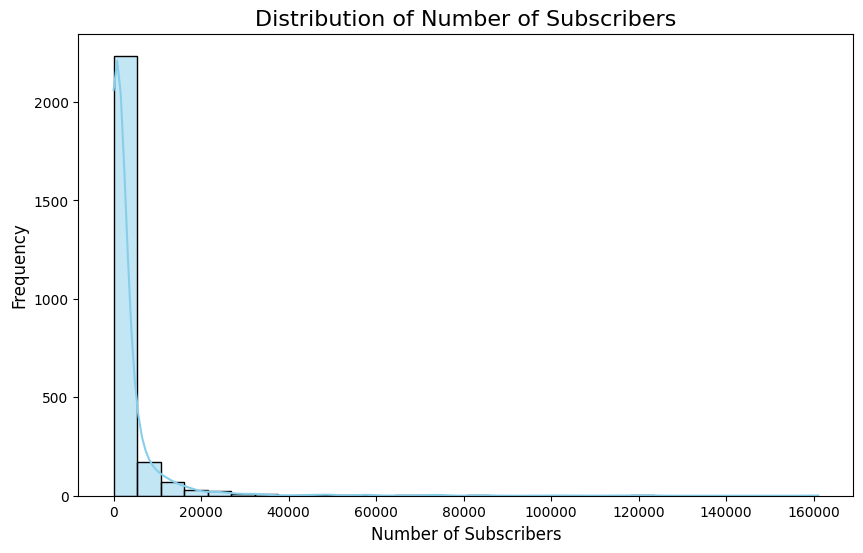

In [ ]:
# Plot distribution of subscribers

plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x=y_train, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Number of Subscribers', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

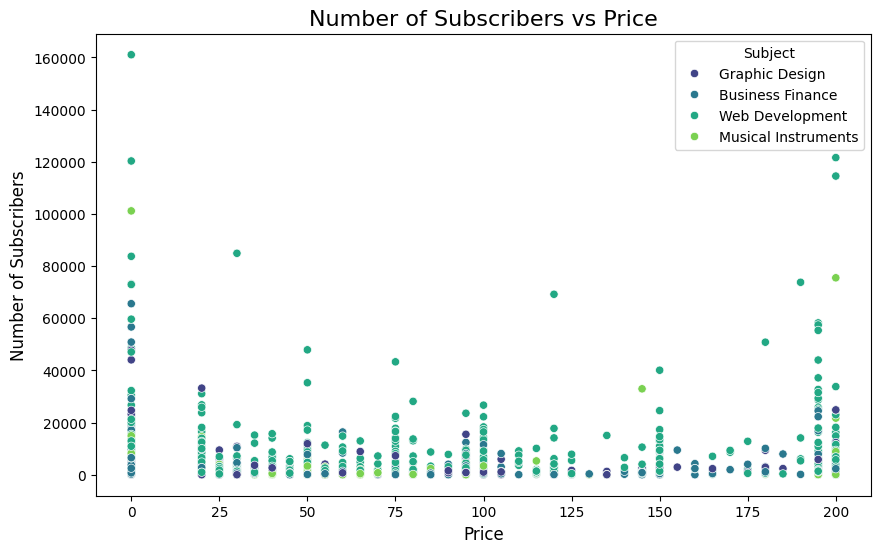

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='price', y=y_train, hue='subject', palette='viridis')
plt.title('Number of Subscribers vs Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)
plt.legend(title='Subject')
plt.show()

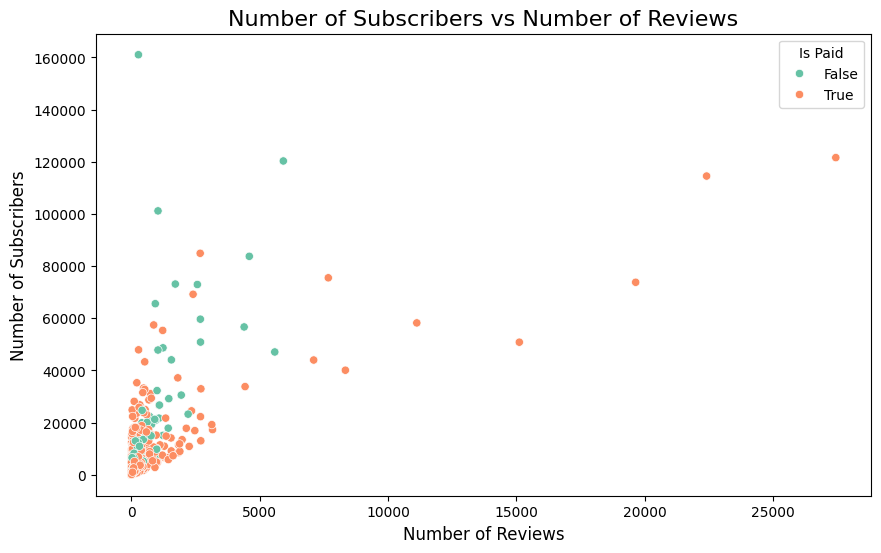

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='num_reviews', y=y_train, hue='is_paid', palette='Set2')
plt.title('Number of Subscribers vs Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)
plt.legend(title='Is Paid')
plt.show()

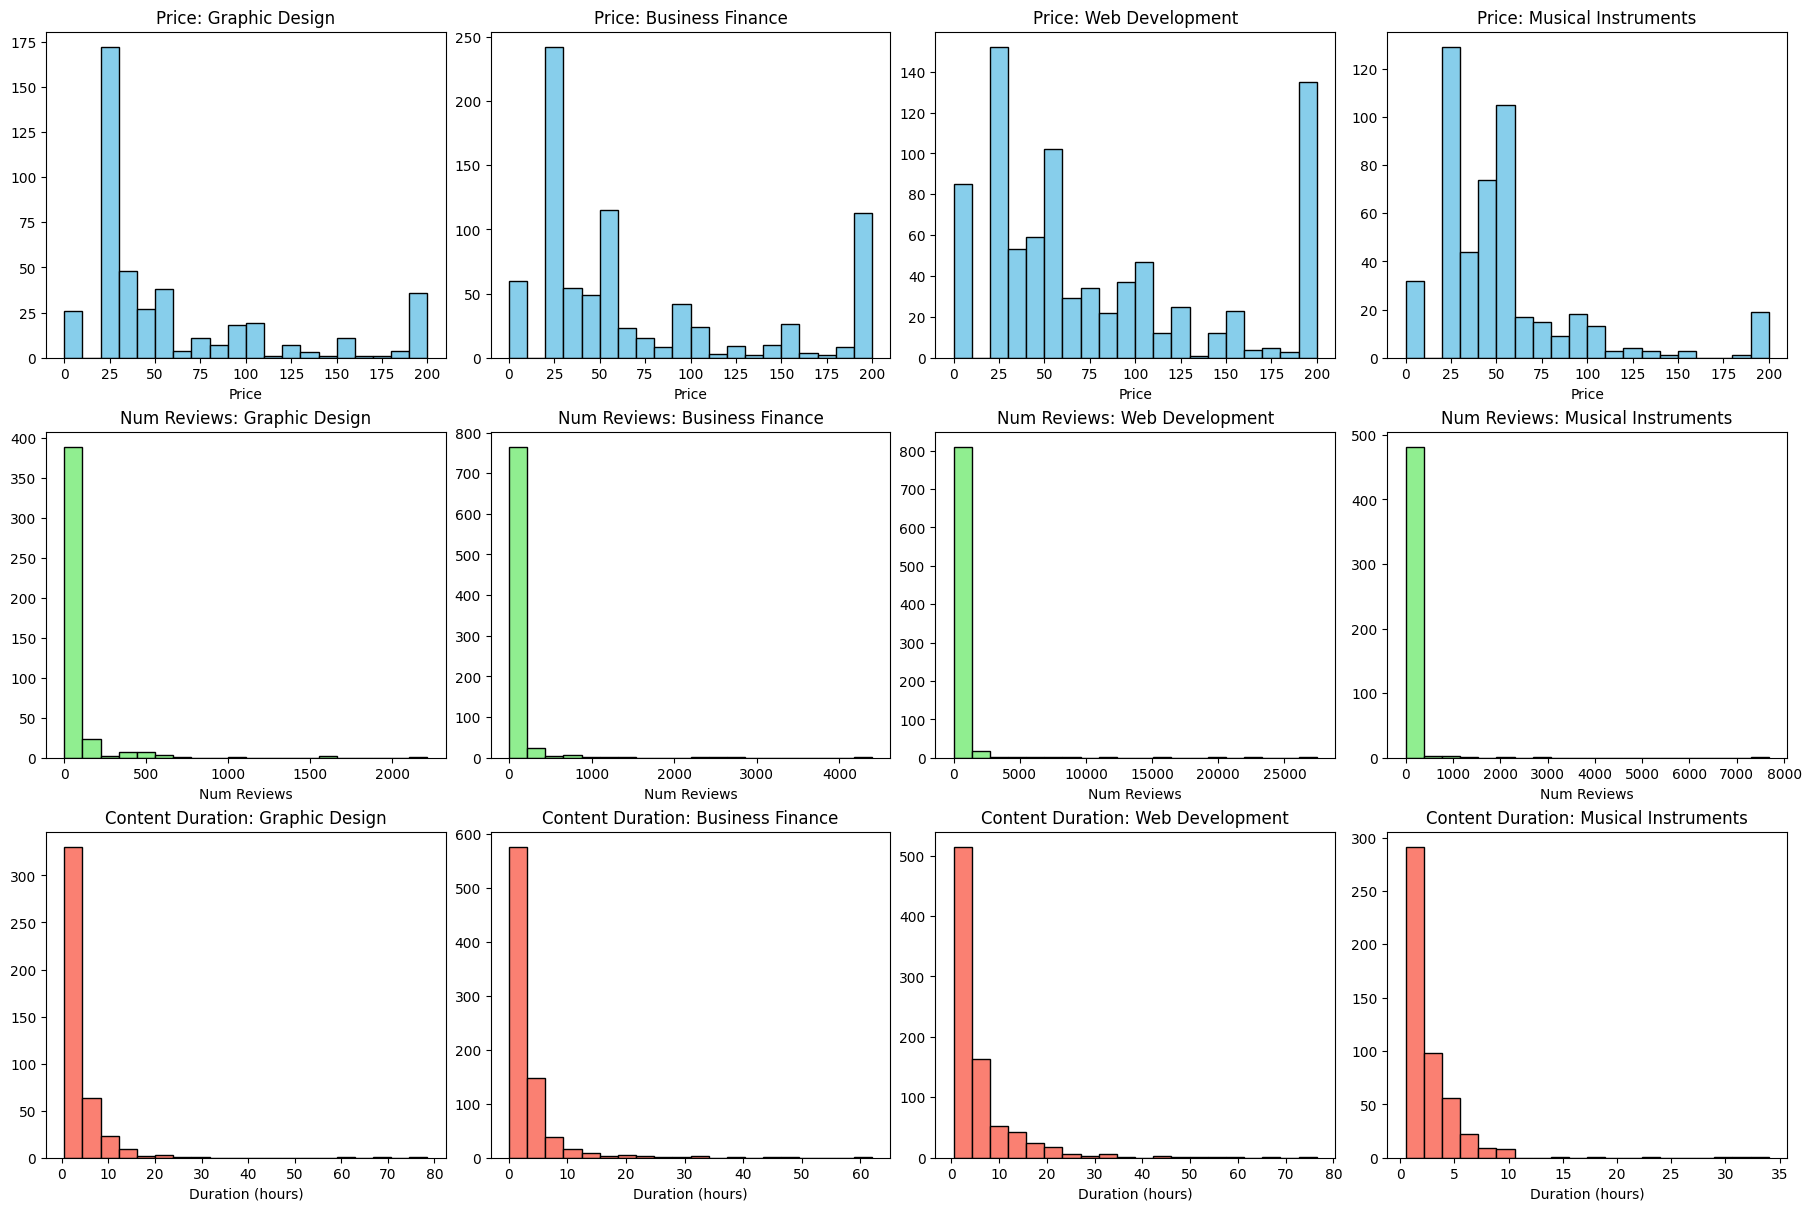

In [ ]:
# Subplots for distributions grouped by subject
fig, axs = plt.subplots(3, len(train_data['subject'].unique()), figsize=(18, 12), constrained_layout=True)

for i, subject in enumerate(train_data['subject'].unique()):
    # Price distribution
    axs[0, i].hist(train_data[train_data['subject'] == subject]['price'], bins=20, color='skyblue', edgecolor='black')
    axs[0, i].set_title(f'Price: {subject}')
    axs[0, i].set_xlabel('Price')

    # Number of Reviews distribution
    axs[1, i].hist(train_data[train_data['subject'] == subject]['num_reviews'], bins=20, color='lightgreen', edgecolor='black')
    axs[1, i].set_title(f'Num Reviews: {subject}')
    axs[1, i].set_xlabel('Num Reviews')

    # Content Duration distribution
    axs[2, i].hist(train_data[train_data['subject'] == subject]['content_duration'], bins=20, color='salmon', edgecolor='black')
    axs[2, i].set_title(f'Content Duration: {subject}')
    axs[2, i].set_xlabel('Duration (hours)')

plt.show()

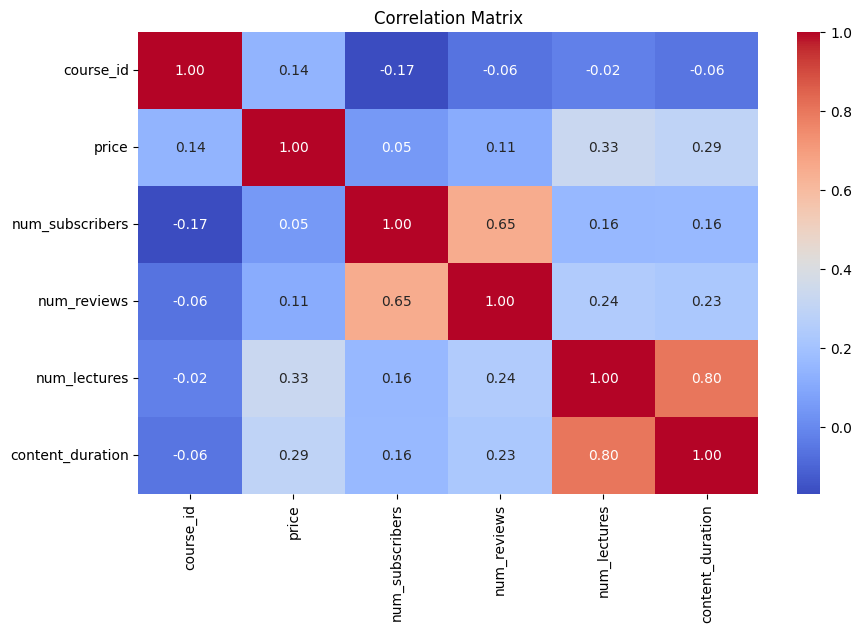

In [ ]:
# Analyze correlations (use only numerical data)
numeric_data = courses_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check for the null values in train set

print(X_train.isnull().sum())
print(y_train.isnull().sum())

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64
0


In [ ]:
# Check for the null values in test set

print(X_test.isnull().sum())
print(y_test.isnull().sum())

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64
0


In [ ]:
# Check for the duplicate values in train set

duplicates = train_data.duplicated()
print(duplicates)
num_duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

1644    False
168     False
3410    False
962     False
945     False
        ...  
1130    False
1294    False
860     False
3507    False
3174    False
Length: 2574, dtype: bool
Number of duplicate rows: 2


In [ ]:
# Drop less important data coloumns

X_train = X_train.drop(columns=['course_id', 'course_title', 'url', 'published_timestamp','num_lectures','content_duration'])
X_test = X_test.drop(columns=['course_id', 'course_title', 'url', 'published_timestamp','num_lectures','content_duration'])

## **Data Preprocessing**

### **Handle the Missing Data/Null Data**

There is no missing data to handle in this dataset.

### **Handle the Duplicate Values**

In [ ]:
# Check duplicate values and drop duplicate values

train_data = train_data.drop_duplicates()
num_duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
print(train_data.shape)

Number of duplicate rows: 0
(2572, 12)


### **Handle the categorical features**

In [ ]:
# One-Hot Encoding for 'is_paid' and 'subject' and 'level' columns
onehot_encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder( sparse_output=False), ['is_paid', 'subject', 'level'])], remainder='passthrough')

# Apply one-hot encoding
X_train_encoded = onehot_encoder.fit_transform(X_train)
X_test_encoded = onehot_encoder.transform(X_test)

# Convert encoded data back to DataFrame
encoded_feature_names = onehot_encoder.get_feature_names_out()
X_train = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Display the transformed data
print("Transformed X_train:")
print(X_train.head())
print("Transformed X_test:")
X_test.head()

Transformed X_train:
      onehot__is_paid_False  onehot__is_paid_True  \
1644                    0.0                   1.0   
168                     0.0                   1.0   
3410                    0.0                   1.0   
962                     0.0                   1.0   
945                     0.0                   1.0   

      onehot__subject_Business Finance  onehot__subject_Graphic Design  \
1644                               0.0                             1.0   
168                                1.0                             0.0   
3410                               0.0                             0.0   
962                                1.0                             0.0   
945                                1.0                             0.0   

      onehot__subject_Musical Instruments  onehot__subject_Web Development  \
1644                                  0.0                              0.0   
168                                   0.0                  

,onehot__is_paid_False,onehot__is_paid_True,onehot__subject_Business Finance,onehot__subject_Graphic Design,onehot__subject_Musical Instruments,onehot__subject_Web Development,onehot__level_All Levels,onehot__level_Beginner Level,onehot__level_Expert Level,onehot__level_Intermediate Level,remainder__price,remainder__num_reviews
2129,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20.0,4.0
1744,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,5.0
3172,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0
2845,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,20.0,73.0
1691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,5.0


### **Scale the Numerical Features**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numerical columns
numerical_columns = ['remainder__num_reviews']

# Apply the scaler to numerical columns in training and test data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Display the transformed data
print("Normalized X_train:")
print(X_train.head())

print("Normalized X_test:")
X_test.head()

Normalized X_train:
      onehot__is_paid_False  onehot__is_paid_True  \
1644                    0.0                   1.0   
168                     0.0                   1.0   
3410                    0.0                   1.0   
962                     0.0                   1.0   
945                     0.0                   1.0   

      onehot__subject_Business Finance  onehot__subject_Graphic Design  \
1644                               0.0                             1.0   
168                                1.0                             0.0   
3410                               0.0                             0.0   
962                                1.0                             0.0   
945                                1.0                             0.0   

      onehot__subject_Musical Instruments  onehot__subject_Web Development  \
1644                                  0.0                              0.0   
168                                   0.0                   

,onehot__is_paid_False,onehot__is_paid_True,onehot__subject_Business Finance,onehot__subject_Graphic Design,onehot__subject_Musical Instruments,onehot__subject_Web Development,onehot__level_All Levels,onehot__level_Beginner Level,onehot__level_Expert Level,onehot__level_Intermediate Level,remainder__price,remainder__num_reviews
2129,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20.0,-0.154988
1744,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,-0.153967
3172,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.150903
2845,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,20.0,-0.084521
1691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,-0.153967


### **Handling the Imbalance Nature of the Dataset**

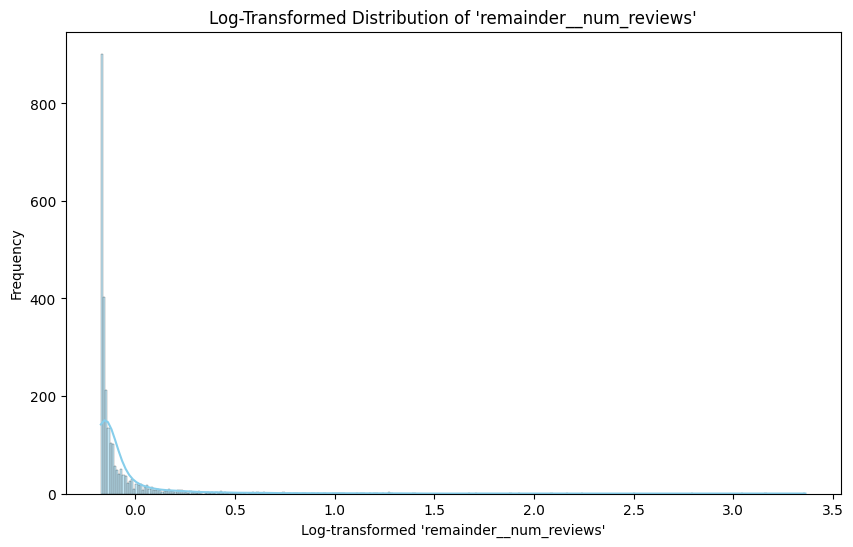

In [ ]:
# Apply log transformation to 'remainder__num_reviews' in training and testing datasets
X_train['remainder__num_reviews_log'] = np.log1p(X_train['remainder__num_reviews'])  # log1p handles zero values
X_test['remainder__num_reviews_log'] = np.log1p(X_test['remainder__num_reviews'])

plt.figure(figsize=(10, 6))
sns.histplot(X_train['remainder__num_reviews_log'], kde=True, color="skyblue")
plt.title("Log-Transformed Distribution of 'remainder__num_reviews'")
plt.xlabel("Log-transformed 'remainder__num_reviews'")
plt.ylabel("Frequency")
plt.show()

## **Model Implementation**

### **Linear Regression Model Implementation:**

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

### **Random Forest Regressor Model Implementation:**

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

## **Model Evaluation and Discussion**

### **Linear Regression Model Evaluation:**

In [ ]:
# Evaluate the model
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Training Data - Mean Squared Error: {mse_train_linear}")
print(f"Test Data - Mean Squared Error: {mse_test_linear}")
print(f"Training Data - R-squared: {r2_train_linear}")
print(f"Test Data - R-squared: {r2_test_linear}")

Linear Regression Model Evaluation:
Training Data - Mean Squared Error: 32893310.409970738
Test Data - Mean Squared Error: 54137644.32895015
Training Data - R-squared: 0.5801431827574626
Test Data - R-squared: 0.5418862627886263


### **Tune Hyperparameter for Linear Regression Model**

In [ ]:
# Define the range of degrees to test
degrees = [1, 2]

# Initialize the linear model
linear_model = LinearRegression()

# Store the results for each degree
results = {}

for degree in degrees:
    # Create polynomial features for the current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model with polynomial features
    linear_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_train = linear_model.predict(X_train_poly)
    y_pred_test = linear_model.predict(X_test_poly)

    # Evaluate the model using R-squared
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Store the results
    results[degree] = {
        'R-squared (Train)': r2_train,
        'R-squared (Test)': r2_test
    }

# Print the results for each degree
for degree, result in results.items():
    print(f"Degree {degree}:")
    print(f"Training R-squared: {result['R-squared (Train)']}")
    print(f"Test R-squared: {result['R-squared (Test)']}")
    print("-" * 30)

Degree 1:
Training R-squared: 0.5801431827574626
Test R-squared: 0.5418862627886266
------------------------------
Degree 2:
Training R-squared: 0.6477077383326931
Test R-squared: 0.7297207999329455
------------------------------


### **Random Forest Regressor Model Evaluation:**

In [ ]:
# Evaluate the model
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Training Data - Mean Squared Error: {mse_train_rf}")
print(f"Test Data - Mean Squared Error: {mse_test_rf}")
print(f"Training Data - R-squared: {r2_train_rf}")
print(f"Test Data - R-squared: {r2_test_rf}")

Random Forest Model Evaluation:
Training Data - Mean Squared Error: 5679099.958428766
Test Data - Mean Squared Error: 49951472.32832333
Training Data - R-squared: 0.9275108280793363
Test Data - R-squared: 0.5773097268788665


### **Tune Hyperparameter for Random Forest Regressor Model**

In [ ]:
# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Corrected 'max_features' values
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on training and test data
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("\nTuned Random Forest Model Evaluation:")
print(f"Training Data - Mean Squared Error: {mse_train_rf}")
print(f"Test Data - Mean Squared Error: {mse_test_rf}")
print(f"Training Data - R-squared: {r2_train_rf}")
print(f"Test Data - R-squared: {r2_test_rf}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Tuned Random Forest Model Evaluation:
Training Data - Mean Squared Error: 17165288.524911895
Test Data - Mean Squared Error: 53757688.65140321
Training Data - R-squared: 0.7808988114210981
Test Data - R-squared: 0.545101454686487


### **Discussion**

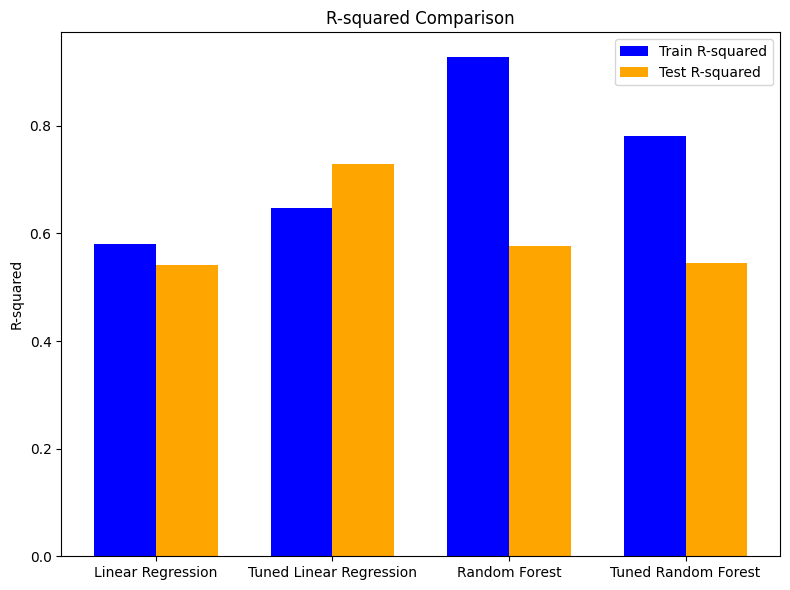

In [ ]:
# Metrics for all models
models = ['Linear Regression','Tuned Linear Regression', 'Random Forest', 'Tuned Random Forest']
r2_train = [0.5801431827574626,0.6477077383326931,  0.9275108280793363, 0.7808988114210981]
r2_test = [0.5418862627886266,0.7297207999329455, 0.5773097268788665, 0.545101454686487]

# Plot R-squared
plt.figure(figsize=(8, 6))

bar_width = 0.35
x = np.arange(len(models))
plt.bar(x - bar_width / 2, r2_train, bar_width, label='Train R-squared', color='blue')
plt.bar(x + bar_width / 2, r2_test, bar_width, label='Test R-squared', color='orange')
plt.xticks(x, models)
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()

1. **Linear Regression Model:**

**Training Performance:** The R-squared value of 0.58 indicates moderate performance, the model captures variance in the data but is not highly predictive.

**Test Performance:** The R-squared value of 0.54 is similar to the training set, but it is still underfit the data.

2. **Random Forest Model:**

**Training Performance:** The R-squared value of 0.92 indicates better performance on the training data compared to Linear Regression.

**Test Performance:** The R-squared value of 0.57 is close to that of the Linear Regression model, indicating that Random Forest may be overfitting.

3. **Linear Regression vs. Tuned Linear Regression:**

**Training R-squared:**
The Linear Regression model has an R-squared of 0.58, indicating moderate performance.
The Tuned Linear Regression model, with polynomial features (degree 2), improves the training R-squared to 0.65, showing better data fitting.

**Test R-squared:**
Linear Regression has a test R-squared of 0.54, indicating a fair generalization.
The Tuned Linear Regression achieves a significant improvement in the test R-squared to 0.73.

4. **Random Forest vs. Tuned Random Forest:**

**Training R-squared:**
The Random Forest model achieves a very high training R-squared of 0.93, indicating it fits the training data well but may overfit.
The Tuned Random Forest reduces the training R-squared to 0.78, it has better balance between model complexity and fitting.

**Test R-squared:**
The Random Forest model's test R-squared is 0.58,which overfitting compared to its training performance.
The Tuned Random Forest has a test R-squared of 0.55, lower but indicating reduced overfitting and more robust performance.

5. **Linear Models vs. Random Forest Models:**

The tuned Linear Regression models provide better generalization performance on test data compared to Random Forest models. However, the Random Forest models demonstrate better capability to capture complex relationships in the data, reflected in their higher training R-squared values.

## **Conclusion**

In this project, multiple regression models were analyzed to predict the number of subscribers for Udemy courses. The models included Linear Regression, Random Forest, and their tuned variants. Each model's performance was evaluated based on its ability to capture patterns in the training data measured by R-squared and its generalization to unseen test data.

Linear Regression demonstrated a moderate level of effectiveness, yielding R-squared values of 0.58 for training and 0.54 for testing.
Random Forest managed to explain a greater proportion of variance, boasting a training R-squared of 0.92 but exhibited slight overfitting, reflected in a test R-squared of 0.57.
The Linear Regression model, when enhanced with polynomial features, significantly elevated its test R-squared to 0.73, achieving a balance between complexity and generalization.
Random Forest showed reduced overfitting with a training R-squared falling to 0.78, its test performance R-squared of 0.55 remained somewhat weaker.

In Conclusion, The optimized Linear Regression model stands out as the most dependable and interpretable option. It delivers the highest predictive performance with a test R-squared of 0.73, strikes a balance between complexity and generalization, and minimizes the risk of significant overfitting.

## **References**

* Davis, M., & Patel, R. (2018). Marketing Analytics for E-Learning Platforms. Marketing Science Review

* Agarwal, R., & Ray, S. (2020). E-learning Adoption Trends and Their Impact on Subscriber Growth. Journal of Digital Education

* Smith, J., & Turner, P. (2021). Predicting User Engagement with Machine Learning. Proceedings of the AI and Education Conference

* [Linear Regression vs Random Forest](https://medium.com/@amit25173/linear-regression-vs-random-forest-7288522be3aa)

* [Hyperparameter Tuning in Linear Regression](https://www.geeksforgeeks.org/hyperparameter-tuning-in-linear-regression/)

* [Random Forest Hyperparameter Tuning in Python](https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/)

In [ ]:
!jupyter nbconvert --to html GP_72.ipynb

[NbConvertApp] Converting notebook GP_72.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 917520 bytes to GP_72.html
